# Исследование перспективного тарифа для телеком-компании.

<h1>Описание проекта.<span class="tocSkip"></span></h1>

Вы аналитик телеком-компании — оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей телеком-компании: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.



# Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей



Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

# Задачи исследования.

<b>1. Изучение данных.</b>

- изучение датасета
- поиск аномалий
- предварительные выводы


<b>2. Обработка данных.</b> 

- поиск и обработка пропусков
- замена типов данных
- удаление дубликатов
- поиск и устранение ошибок в данных


<b>Просчет для каждого пользователя:</b>

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

<b>3. Анализ данных.</b>

- Описание поведения клиентов оператора, исходя из выборки. 
- Подсчет количества минут разговора, количества сообщений и  объёма интернет-трафика требуемого пользователям каждого тарифа в месяц
- Подсчет среднего количества, дисперсии и стандартного отклонения. 
- Построение гистограмм. 
- Описание распределения.

<b>4. Проверка гипотез.</b>

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<b>5. Результаты исследования.</b>

- Общие выводы
- Рекомендации

# Основная цель проекта:


Для коммерческого департамента компании "Мегалайн" определить какой из тарифных планов услуг связи («Смарт» или «Ультра») более прибыльный (какой приносит компании больше денег) и дать рекоментации по корректировке рекламного бюджета.


<b>ОПИСАНИЕ  ДАННЫХ:</b>

<b>Таблица users (информация о пользователях):</b>


user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tarif — название тарифного плана


<b>Таблица calls (информация о звонках):</b>


id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок


<b>Таблица messages (информация о сообщениях):</b>


id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение



<b>Таблица internet (информация об интернет-сессиях):</b>


id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя


<b>Таблица tariffs (информация о тарифах):</b>


tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных 

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None


In [2]:
users = pd.read_csv('/datasets/......csv')
calls = pd.read_csv('/datasets/.....csv')
messages = pd.read_csv('/datasets/.......csv')
internet = pd.read_csv('/datasets/......csv')
tariffs = pd.read_csv('/datasets/.......csv')

### Изучение данных пользователей (users)

In [3]:
# Напишем функцию изучения таблиц датасета для общей информации, пропусков,
#дубликатов, описательной статистики 
#для изучения первых, последних и рандомных строк функцию не пишу,
#так как мне удобнее их изучать отдельно, чтобы не запутаться
def info_result(data_frame):
    print('\n')
    print('Общая информация')     
    print(data_frame.info())
    print('\n')
    print('Пропуски')
    print(data_frame.isna().sum())
    print('\n')
    print('Дубликаты')
    print(data_frame.duplicated().sum())
    print('\n')
    print('Описательная статистика')
    print(data_frame.describe())

In [4]:
# первые 10 строк датасета

users.head(10)



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [5]:
#последние 10 строк датасета
users.tail(10)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [6]:
#рандомная выборка
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
188,1188,41,NaN,Санкт-Петербург,Габриэль,Соколов,2018-02-04,smart
215,1215,55,NaN,Рязань,Руслан,Алиев,2018-08-12,smart
229,1229,24,NaN,Москва,Нелли,Зубкова,2018-10-29,smart
379,1379,39,NaN,Москва,Нелли,Кочергина,2018-08-09,ultra
251,1251,48,NaN,Пермь,Роксана,Тетерина,2018-02-13,smart
421,1421,30,NaN,Калининград,Гайдар,Александрович,2018-02-22,smart
240,1240,30,NaN,Воронеж,Зинаида,Шарова,2018-02-27,ultra
300,1300,40,NaN,Москва,Тихон,Азерников,2018-07-26,ultra
127,1127,26,NaN,Казань,Альберта,Ильина,2018-04-11,smart
342,1342,20,NaN,Новосибирск,Валентина,Казакова,2018-10-18,smart


In [7]:
# общая информация, пропущенные значения, дубликаты, описательная статистика

info_result(users)



Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Пропуски
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


Дубликаты
0


Описательная статистика
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


Есть пропуски только в churn_date ("дата прекращения пользования тарифом"), значит на момент выгрузки данный тариф действующий. Дубликатов нет.
Необходимо изменить тип данных в столбцах "дата подключения тарифа" (reg_date) и "дата прекращения пользования тарифом"(churn_date) к типу datetime. 

### Изучение данных звонков (calls)

In [8]:
#первые 10 строк датасета
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [9]:
#последние 10 строк датасета
calls.tail(10)

,id,call_date,duration,user_id
202597,1499_210,2018-10-02,8.86,1499
202598,1499_211,2018-12-29,4.58,1499
202599,1499_212,2018-12-30,1.35,1499
202600,1499_213,2018-10-17,10.77,1499
202601,1499_214,2018-12-05,2.42,1499
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [10]:
#рандомная выборка
calls.sample(10)

,id,call_date,duration,user_id
42308,1104_210,2018-02-22,8.75,1104
95963,1244_218,2018-08-27,0.00,1244
187777,1464_297,2018-08-21,13.75,1464
164700,1407_144,2018-09-29,0.00,1407
35951,1089_424,2018-05-19,10.22,1089
171417,1425_29,2018-11-11,12.78,1425
194955,1477_703,2018-06-01,3.72,1477
140238,1358_0,2018-10-03,0.00,1358
11803,1030_336,2018-08-05,0.00,1030
51472,1127_135,2018-06-26,0.00,1127


In [11]:
# общая информация, пропущенные значения, дубликаты, описательная статистика
info_result(calls)



Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


Пропуски
id           0
call_date    0
duration     0
user_id      0
dtype: int64


Дубликаты
0


Описательная статистика
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


В данных мы нашли звонки с нулевой продолжительностью. Как указано в задании - это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Пропущенных значений и дубликатов нет. Хорошо.

Тип данных в столбце "call_date" — дата звонка, нужно привести к типу данных - datetime, столбец "id" к типу данных int.

Столбец "duration" (длительность звонка в минутах) тип данных float привести к типу данных int, округлив вверх, так как оперетор связи по условиям задания, каждый звонок округляет отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

### Изучение данных messages (информация о сообщениях).

In [12]:
#первые 10 строк датасета
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [13]:
#последние 10 строк датасета
messages.tail(10)

,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [14]:
#рандомная выборка
messages.sample(10)

,id,message_date,user_id
35098,1150_278,2018-12-29,1150
33927,1147_69,2018-08-23,1147
78020,1330_46,2018-06-15,1330
39724,1168_502,2018-08-02,1168
118838,1482_400,2018-04-26,1482
80600,1335_512,2018-08-05,1335
118919,1482_481,2018-11-27,1482
122693,1498_9,2018-07-19,1498
77423,1326_64,2018-09-15,1326
101076,1414_20,2018-06-28,1414


In [15]:
# общая информация, пропущенные значения, дубликаты, описательная статистика
info_result(messages)



Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


Пропуски
id              0
message_date    0
user_id         0
dtype: int64


Дубликаты
0


Описательная статистика
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


Пропущенных значений и дубликатов нет. Тип данных столбца "message_date"  нужно привести к datetime, столбец "id" к типу данных int.

### Изучение данных таблицы internet (информация об интернет-сессиях).

In [16]:
#первые 10 строк датасета
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [17]:
#последние 10 строк датасета
internet.tail(10)

,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [18]:
#рандомная выборка
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
125612,125612,1423_69,341.81,2018-09-05,1423
144672,144672,1483_51,992.14,2018-06-20,1483
17488,17488,1059_494,0.00,2018-10-17,1059
76286,76286,1255_482,193.36,2018-06-21,1255
90286,90286,1306_20,335.07,2018-12-24,1306
88262,88262,1299_179,209.63,2018-03-15,1299
103841,103841,1352_65,553.32,2018-12-26,1352
84359,84359,1286_41,354.72,2018-12-29,1286
110277,110277,1374_488,646.39,2018-06-03,1374
46406,46406,1158_243,359.30,2018-02-06,1158


In [19]:
# общая информация, пропущенные значения, дубликаты, описательная статистика
info_result(internet)



Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


Пропуски
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


Дубликаты
0


Описательная статистика
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    1724.830000    1499.0000

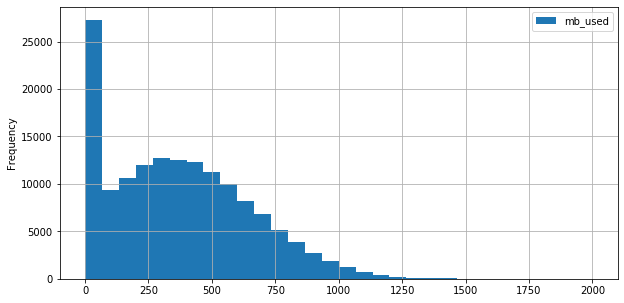

In [20]:
# Видим на минимуме нулевые значения, посмотрим на гистограмме сколько их
internet.plot(y='mb_used', x='user_id', kind='hist', bins=30, range=(0, 2000), grid=True, figsize=(10,5))

Посмотрели на пользование трафиком, нулевых значений мало. Уберем нулевые значения, т.к. скорее всего в этот день человек не пользовался интернетом, но даже если и там что-то было, то возможности восстановить у нас нет и нулевые значения так же не несут никакой информативности, но могут повлиять на общий результат анализа.

In [21]:
# Обработаем записи о сессиях в интернете (internet)
# Исключим из рассмотрения сессии с нулевой продолжительностью:
print('Количество записей до удаления:', len(internet)) # 149396
internet = internet.loc[internet['mb_used'] != 0]
print('Количество записей после исключения:', len(internet)) # 129798 

Количество записей до удаления: 149396
Количество записей после исключения: 129798


Пропущенных значений и дубликатов нет. Типы данных в столбце id нужно привести к int, тип данных столбца 'session_date' приведем к типу данных datetime. 

### Изучение данных таблицы tariffs (информация о тарифах).

In [22]:
#первые строки датасета
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
# общая информация, пропущенные значения, дубликаты, описательная статистика
info_result(tariffs)



Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


Пропуски
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64


Дубликаты
0


Описательная статистика
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000 

Данные в порядке. Пропущенных значений и дубликатов не наблюдаем.

### Вывод

Необходимо выполнить следующее:
- в таблице users: изменить тип данных в столбцах "дата подключения тарифа" (reg_date) и "дата прекращения пользования тарифом"(churn_date) к типу datetime
- в таблице calls: тип данных в столбце "call_date" — дата звонка, нужно привести к типу данных - datetime, столбец "id" к типу данных int.,  столбец "duration" (длительность звонка в минутах) тип данных float привести к типу данных int, округлив вверх, так как оперетор связи по условиям задания, каждый звонок округляет отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
- в таблице message: Тип данных столбца "message_date" нужно привести к datetime, столбец "id" к типу данных int.
- в таблице internet: типы данных в столбце id нужно привести к int, тип данных столбца 'session_date' приведем к типу данных datetime

## Предобработка данных

### Замена типов данных

In [24]:
# заменим типы данных в столбце users
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [25]:
#проверим
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [26]:
#заменим типы данных в таблице calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['id'] = calls['id'].astype('int')

In [27]:
#проверим
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.2 MB


In [28]:
#округлим в большую сторону данные столбца "duration" и проверим
calls['duration'] = np.ceil(calls['duration'])
calls.head(10)

,id,call_date,duration,user_id
0,10000,2018-07-25,0.0,1000
1,10001,2018-08-17,0.0,1000
2,10002,2018-06-11,3.0,1000
3,10003,2018-09-21,14.0,1000
4,10004,2018-12-15,6.0,1000
5,10005,2018-11-02,0.0,1000
6,10006,2018-10-18,0.0,1000
7,10007,2018-08-22,19.0,1000
8,10008,2018-09-15,19.0,1000
9,10009,2018-08-15,0.0,1000


In [29]:
calls['duration'] = calls['duration'].astype('int')
calls.head(10)

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000
5,10005,2018-11-02,0,1000
6,10006,2018-10-18,0,1000
7,10007,2018-08-22,19,1000
8,10008,2018-09-15,19,1000
9,10009,2018-08-15,0,1000


In [30]:
#заменим типы данных в столбце message и проверим
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
messages['id'] = messages['id'].astype('int')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


In [31]:
#заменим типы данных в толбце internet и проверим
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
internet['id'] = internet['id'].astype('int')
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null int64
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.9 MB


### Количество совершенных звонков и израсходованных минут разговора по месяцам

In [32]:
#для удобства столбец с месяцами переводим более удобный тип
calls['month'] = calls['call_date'].dt.month
calls.head(10)

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0,1000,7
1,10001,2018-08-17,0,1000,8
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12
5,10005,2018-11-02,0,1000,11
6,10006,2018-10-18,0,1000,10
7,10007,2018-08-22,19,1000,8
8,10008,2018-09-15,19,1000,9
9,10009,2018-08-15,0,1000,8


In [33]:
#расчитаем количество и добавим в таблицу
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index().rename(columns={'duration':'calls_duration','id':'calls_total'})

In [34]:
user_calls.head()


,user_id,month,calls_duration,calls_total
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


### Количество отправленных сообщений по месяцам

In [35]:
#расчитаем количество сообщений по месяцам и добавим в таблицу
messages['month'] = messages['message_date'].dt.month
users_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total'})
users_messages.head()

,user_id,month,sms_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Объем израсходованного интернет-трафика по месяцам

In [36]:
#расчитаем объем интернет трафика по месяцам и добавим в таблицу и переименуем столбец для удобства дальнейшей работы
internet['month'] = internet['session_date'].dt.month
users_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'gb_total_internet'})
users_internet.head()

,user_id,month,gb_total_internet
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [37]:
#Для удобства дальнейших расчетов переведем столбец с мегабайтами в гигабайты.
# Насколько мы знаем, что гигабайт равен 1024 мб,
# то и будем делить на это число.
#Так же округлим вверх до ГБ, т.к. оператор в дальнейшем списывает средства за потраченные ГБ, а не МБ
users_internet['gb_total_internet'] = users_internet.gb_total_internet / 1024
users_internet.gb_total_internet = np.ceil(users_internet.gb_total_internet)
users_internet.head(10)

,user_id,month,gb_total_internet
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
5,1000,10,15.0
6,1000,11,15.0
7,1000,12,10.0
8,1001,11,18.0
9,1001,12,14.0


In [38]:
# В связи с тем, что мы перевели мегабайты в столбце 'mb_used'(после переименования - 'gb_total_internet')
# для дальнейшего расчета нам нужен будет столбец с количеством трафика включенным в пакет, а он у нас тоже
# изначально в датасете в мегабайтах, то также переведем в Гигабайты столбец 'mb_per_month_included'
# и переименуем его
tariffs['mb_per_month_included'] = tariffs.mb_per_month_included / 1024
tariffs.mb_per_month_included  = np.ceil(tariffs.mb_per_month_included)
tariffs = tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'})
tariffs.head(10)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


### Помесячная выручка с каждого пользователя

In [39]:
#создадим сводную таблицу
df = user_calls.merge(users_messages, on=['user_id','month'], how ='outer').reset_index(drop=True)
df = df.merge(users_internet, on=['user_id','month'], how = 'outer').reset_index(drop=True)
df = df.merge(users, on=['user_id'], how ='outer').reset_index(drop=True)
df = df.merge(tariffs, left_on=['tariff'], right_on='tariff_name', how = 'outer').reset_index(drop=True)
df.head()

,user_id,month,calls_duration,calls_total,sms_total,gb_total_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,159.0,22.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra
1,1000,6.0,172.0,43.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra
2,1000,7.0,340.0,47.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra
3,1000,8.0,408.0,52.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra
4,1000,9.0,466.0,58.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra


In [40]:
#проверим пропуски еще раз
df.isna().sum()

user_id                     0
month                       2
calls_duration             42
calls_total                42
sms_total                 499
gb_total_internet          15
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

Пропуски в числовых показателях заменим на нули, так как это скорее всего означает отсутствие в этот день звонков, выхода в интернет, отправления сообщений. Пропуски в колонке 'month' скорее всего появились при изменении типа данных, они, видимо, изначально были записаны некорректно в датасете. Так как пропусков таких всего два, заменим также на нулевое значение.

In [41]:
#заменим все получившиеся пропуски в количестве звонков/минутах/сообщениях/трафике/месяце на нули
df['sms_total'] = df['sms_total'].fillna(0)
df['gb_total_internet'] = df['gb_total_internet'].fillna(0)
df['calls_duration'] = df['calls_duration'].fillna(0)
df['calls_total'] = df['calls_total'].fillna(0)
df['month'] = df['month'].fillna(0)
df.isna().sum()

user_id                     0
month                       0
calls_duration              0
calls_total                 0
sms_total                   0
gb_total_internet           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

In [42]:
#проверим еще раз дубликаты
df.duplicated().sum()

0

In [43]:
# произведем расчет выручки в месяц и добавим в сводную таблицу колонку 'revenue_month'
df['cost_gb'] = (df['gb_total_internet'] - df['gb_per_month_included']) * df['rub_per_gb']
df['cost_minutes'] = (df['calls_duration'] - df['minutes_included']) * df['rub_per_minute']
df['cost_messages'] = (df['sms_total'] - df['messages_included']) * df['rub_per_message']
df.loc[df['cost_gb'] < 0, 'cost_gb'] = 0
df.loc[df['cost_minutes'] < 0, 'cost_minutes'] = 0
df.loc[df['cost_messages'] < 0, 'cost_messages'] = 0
df['revenue_month'] = df['cost_gb'] + df['cost_minutes'] + df['cost_messages'] + df['rub_monthly_fee']
#Удалим ненужные нам столбцы.

df.drop(['cost_gb', 'cost_minutes', 'cost_messages'], axis=1, inplace=True) 
df.head(5)

,user_id,month,calls_duration,calls_total,sms_total,gb_total_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue_month
0,1000,5.0,159.0,22.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
1,1000,6.0,172.0,43.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
2,1000,7.0,340.0,47.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
3,1000,8.0,408.0,52.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
4,1000,9.0,466.0,58.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0


### Вывод

Составили отчёт о ежемесячной активности пользователей обоих тарифных планов. Посчитали ежемесячную выручку с каждого клиента. Подготовлены данные для дальнейшего анализа.

## Анализ данных

### Описание поведения клиентов оператора, исходя из выборки

In [44]:
# для описания поведения клиентов, исходя из выборки, построим гистограммы и рассмотрим распределения переменных 
# используем для автоматизации функцию
# функция строит гистограмму для переменной 'param' датафрейма 'df' с заголовком 'title' - 
# отдельно для каждого тарифа (smart и ultra), и, для удобства сравнения, на одном графике
def hist_display(df, param, title):
    dx = df[param].describe()
    m1 = dx['min']
    m2 = dx['max']
    df.query('tariff=="smart"')[param].plot(kind='hist', x=param, y='Частота', bins=30, range=(m1, m2), grid=True, title=title, figsize=(10,5), legend=True, alpha=0.5, color='g', label='smart') 
    df.query('tariff=="ultra"')[param].plot(kind='hist', x=param, y='Частота', bins=30, range=(m1, m2), grid=True, title=title, figsize=(10,5), legend=True, alpha=0.5, color='blue', label='ultra')
    
    
    

In [45]:
# создадим функцию для построения график распределения для параметра 'param' датафрейма 'df' для каждого тарифного плана (smart и ultra), 
# а также для вывода описания describe() колонки df[param] и расчета дисперсии 'param'
def distplot_display(df, param, title):
    df_dropna = df.dropna(subset=[param])
    df_smart = df_dropna.query('tariff=="smart"')
    df_ultra = df_dropna.query('tariff=="ultra"')
    plt.figure(figsize=(8,5))
    plt.title(title)
    plt.ylabel('Плотность')
    sns.distplot(df_smart[param], color='g', label='smart')
    sns.distplot(df_ultra[param], color='blue', label='ultra')
    plt.legend()
    plt.show()
    
    smart_descr = df_smart[param].describe()
    ultra_descr = df_ultra[param].describe()
    smart_disp = np.var(df_smart[param], ddof=1)
    ultra_disp = np.var(df_ultra[param], ddof=1)
    
    df_describe = pd.concat([smart_descr, ultra_descr], axis=1)
    df_describe.columns = ['smart', 'ultra']
    df_describe.loc['dispersion'] = [smart_disp, ultra_disp]

    print(df_describe)

#### Исследование количества звонков в месяц для тарифов 'ultra' и 'smart'

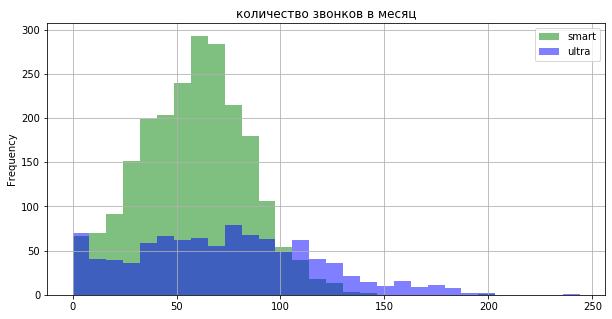

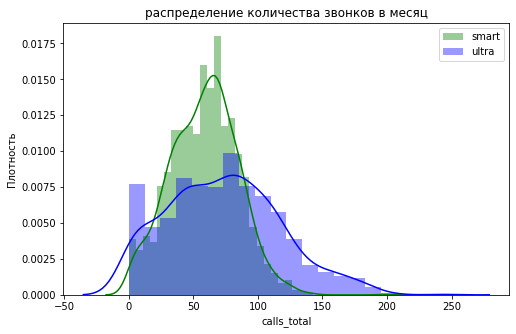

                  smart        ultra
count       2230.000000   986.000000
mean          58.437220    73.318458
std           25.963572    43.956739
min            0.000000     0.000000
25%           40.000000    41.000000
50%           60.000000    73.500000
75%           76.000000   103.750000
max          198.000000   244.000000
dispersion   674.107093  1932.194928


In [46]:
hist_display(df, 'calls_total', 'количество звонков в месяц')
distplot_display(df, 'calls_total', 'распределение количества звонков в месяц')

Общее количество звонков пользователей тарифа Ultra  больше, чем у пользователей тарифа Smart. Что вполне логично, так как в тариф ultra входит больше минут для разговора, соответственно и звонков больше. Интересно, посмотреть на данные по выручке.   
Распределения по обоим тарифам тяготеют к нормальному и скошены вправо. Для тарифа Ultra распределение шире, что говорит о сильном разбросе разброс количества звонков в месяц у пользователей данного тарифа. Это подтверждается и значительной дисперсией.
Среднее количество звонков в мес пользователей Ultra больше, чем у пользователей Smart: 73 и 58 соответственно.
Медианы для обоих тарифов практически совпадают со средними значениями, что говорит о том, что выбросов в выборке немного.

#### Исследование продолжительности разговоров по тарифам 'ultra' и 'smart'.

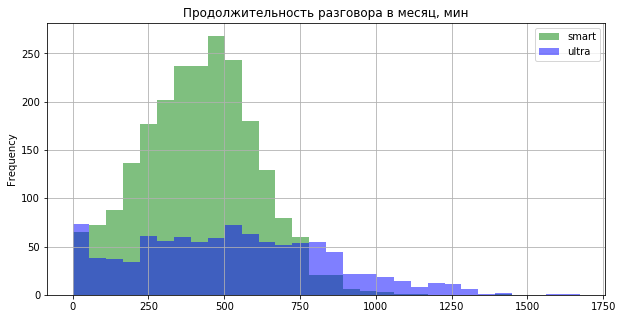

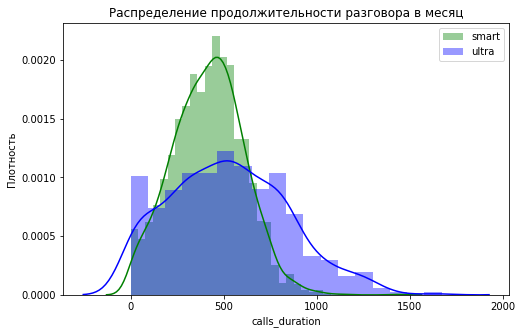

                   smart          ultra
count        2230.000000     986.000000
mean          417.747534     526.089249
std           190.476754     317.887549
min             0.000000       0.000000
25%           282.000000     282.500000
50%           421.500000     518.000000
75%           545.000000     751.750000
max          1435.000000    1673.000000
dispersion  36281.393836  101052.493549


In [47]:
hist_display(df, 'calls_duration', 'Продолжительность разговора в месяц, мин')
distplot_display(df, 'calls_duration', 'Распределение продолжительности разговора в месяц')

Частотные гистограммы и графики распределения похожи на графики количества звонков. Распределение продолжительности звонков пользователей Ultra шире, чем у Smart. Разброс значений по Smart больше. Это мы видим из значительной дисперсии. 
Среднее значение продолжительности звонков абонентов Ultra ежемесячно больше, чем у абонентов Smart: 526 против 417 соответственно.
Медианы по обоим тарифным планам почти совпадают со средними значениями, что подтверждает - выбросов немного.

#### Исследование количества сообщений 'ultra' и 'smart'.

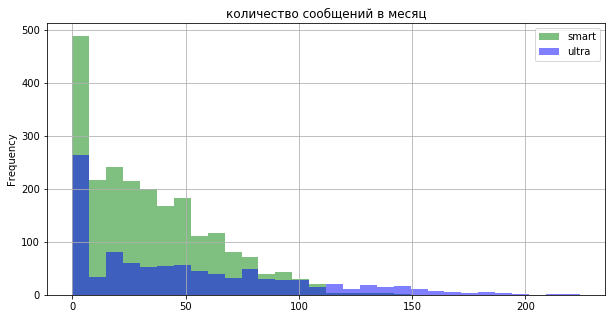

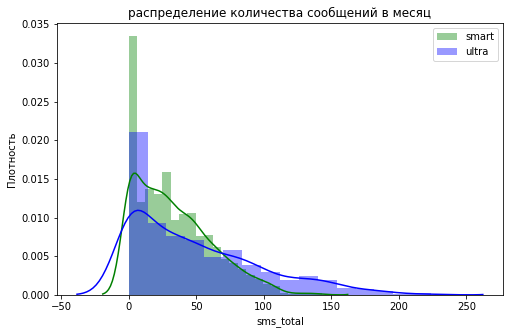

                  smart        ultra
count       2230.000000   986.000000
mean          33.369058    49.313387
std           28.230396    47.806040
min            0.000000     0.000000
25%           10.000000     6.000000
50%           28.000000    38.000000
75%           51.000000    78.750000
max          143.000000   224.000000
dispersion   796.955256  2285.417425


In [48]:
hist_display(df, 'sms_total', 'количество сообщений в месяц')
distplot_display(df, 'sms_total', 'распределение количества сообщений в месяц')

Пользователи тарифа Ultra в среднем отправляют больше sms в месяц, чем пользователи тарифа Smart: 49 и 33 соответственно.
Распределения количества sms по тарифу Ultra шире, чем по Smart и расброс значений, соответственно, больше у Ultra.
Также на графиках видим значителное отсутствие интереса к услуге тарифов по отправке сообщений. Полагаю, это связано с наличием множества альтернативных приложений-мессенджерей смартфонов, в которых нет учета количества сообщений, зависимость в них только от наличия интернета и трафика (более удобный способ не контролировать количество сообщений).

#### Исследование интернет трафика 'ultra' и 'smart'.

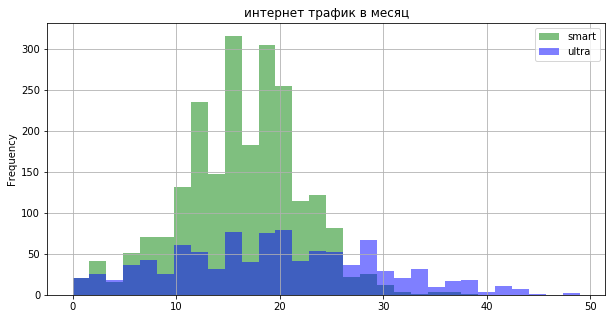

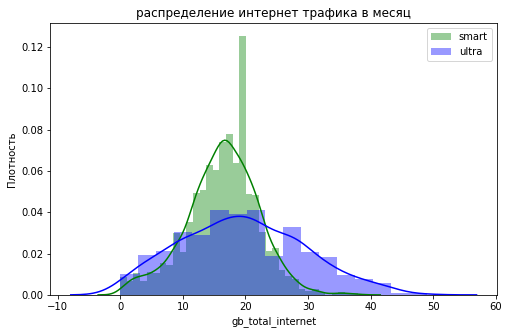

                  smart       ultra
count       2230.000000  986.000000
mean          16.321525   19.474645
std            5.756167    9.868057
min            0.000000    0.000000
25%           13.000000   12.000000
50%           17.000000   19.000000
75%           20.000000   27.000000
max           38.000000   49.000000
dispersion    33.133453   97.378544


In [49]:
hist_display(df, 'gb_total_internet', 'интернет трафик в месяц')
distplot_display(df, 'gb_total_internet', 'распределение интернет трафика в месяц')

При исследовании потребления интернет трафика абонентами наблюдается интересное поведение. Более высокое значение потребления интернет трафика пользователями Ultra (что очевидно, так как больший объем предоставлен в тарифе). Могу предположить, что  пользователи тарифа Smart, имея более низкий объем трафика, не расчитывают изначально на его потребление в большем объеме. Соответственно, разброс значений потребления может быть связан с нестандартными и не частыми ситуациями абонентов Smart, когда они по той или иной причине потребляют большее количество трафика, чем им предоставлено по тарифу.

В среднем пользователи Ultra ежемесячно потребляют больше трафика, чем пользователи Smart: 19.47 Гб и  16.32 Гб).Медианы для обоих тарифов близки к их среднему значению.


#### Исследование выручки в месяц по тарифам 'ultra' и 'smart'.

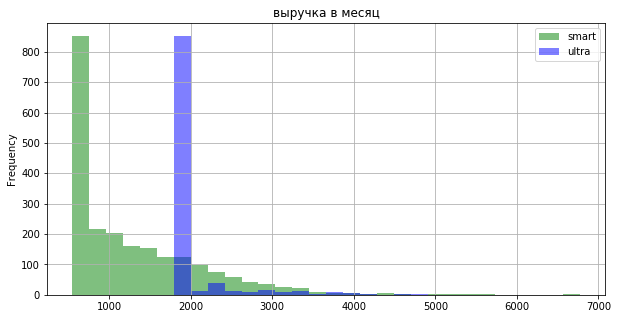

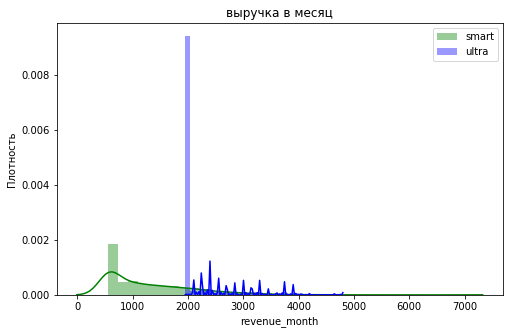

                    smart          ultra
count         2230.000000     986.000000
mean          1289.641704    2070.030426
std            818.370799     376.015578
min            550.000000    1950.000000
25%            550.000000    1950.000000
50%           1021.000000    1950.000000
75%           1750.000000    1950.000000
max           6770.000000    4800.000000
dispersion  669730.763895  141387.714809


In [50]:

hist_display(df, 'revenue_month', 'выручка в месяц')
distplot_display(df, 'revenue_month', 'выручка в месяц')

На графиках видим пиковые значения - это норма и означает выручку в тех случаях, когда абоненты не превысили установленные лимиты минут, сообщений, интернет трафика и заплатили только абонентскую плату.
В среднем пользователи Smart платят меньше, чем пользователи Ultra: 1289 против 2070 соответственно.
Судя по графику, дисперсии и квартилям, абоненты тарифа смарт Smart, намного чаще превышают лимиты, чем абоненты Ultra, соответственно и средняя выручка от них для компании более, чем в 2 раза превышает абонентскую плату по тарифу. Так, средняя выручка от абонентов Smart - 1250 руб., а абонентская плата по тарифу - 550 руб. Средняя выручка от абонентов Ultra 2059 руб, а абонентская плата - 1950 руб. Соответственно, можем предположить, что причиной превышения лимитов тарифного плана и в связи с этим, повышение затрат абонентов фарифа Smart, связана с тем, что при разбросе лимитов на различные услуги сложнее расчитать и проконтролировать потребление этих услуг в повседневной жизни. У абонентов Ultra такой задачи не стоит, так как границы лимитов на услуги мобильной связи существенно выше.

### Вывод

Около одной трети абонентов из нашей выборки пользуются тарифом Ultra, остальным подключен Smart. При этом среднее значение выручки пользователей Ultra на 30 % превышает среднюю выручку в месяц от абонентов Smart.

Но и потребление у пользователей Ultra в среднем выше, чем у пользователей Smart.

Выше при пошаговом анализе данных я более подробно описывала выводы, подводя итог, еще раз тезисно остановлюсь на общих выводах.

- Общее количество звонков пользователей тарифа Ultra больше, чем у пользователей тарифа Smart. Что вполне логично, так как в тариф ultra входит больше минут для разговора, соответственно и звонков больше. Интересно, посмотреть на данные по выручке.Среднее количество звонков в месяц пользователей Ultra больше, чем у пользователей Smart: (73 > 58) соответственно. 


- Распределение продолжительности звонков пользователей Ultra шире, чем у Smart. Разброс значений по Smart больше. Это мы видим из значительной дисперсии. Среднее значение продолжительности звонков абонентов Ultra ежемесячно больше, чем у абонентов Smart: (526 > 417) соответственно. Данное соотношение вполне логично, так как в тарифный план Ultra включено большее количество минут.


- Пользователи тарифа Ultra в среднем отправляют больше sms в месяц, чем пользователи тарифа Smart: (49 > 33) соответственно. Распределения количества sms по тарифу Ultra шире, чем по Smart и расброс значений, соответственно, больше у Ultra. Также на графиках видим значителное отсутствие интереса к услуге тарифов по отправке сообщений. 

- При более высоком значении потребления интернет трафика пользователями Ultra (что очевидно, так как больший объем предоставлен в тарифе), чем абонентами Smart, одновременно же дисперсия абонентов Smart в 3 раза выше, чем Ultra. Могу предположить, что это связано с тем, что пользователи тарифа Smart, имея более низкий объем трафика, не расчитывают изначально на его потребление в большем объеме. Соответственно, разброс значений потребления может быть связан с нестандартными и не частыми ситуациями абонентов Smart, когда они по той или иной причине потребляют большее количество трафика, чем им предоставлено по тарифу.В среднем пользователи Ultra ежемесячно потребляют больше трафика, чем пользователи Smart: (19.74 Гб > 16.32 Гб).


- Анализируя выручку по месяцам абонентов тарифных планов Ultra и Smart, видим пиковые значения на графиках - это норма и означает выручку в тех случаях, когда абоненты не превысили установленные лимиты минут, сообщений, интернет трафика и заплатили только абонентскую плату. В среднем пользователи Smart платят меньше, чем пользователи Ultra: 1289 против 2070 соответственно. Абоненты тарифа смарт Smart, намного чаще превышают лимиты тарифного пакета, чем абоненты Ultra, соответственно и средняя выручка от них для компании более, чем в 2 раза превышает абонентскую плату по тарифу. Можем предположить, что причиной превышения лимитов тарифного плана и в связи с этим, повышение затрат абонентов фарифа Smart, связана с тем, что при разбросе лимитов на различные услуги сложнее расчитать и проконтролировать потребление этих услуг в повседневной жизни. 



## Проверка гипотез

### Средняя выручка пользователей тарифов «Ultra» и «Smart» различаются

Предположим, что средняя выручка пользователей Ultra и Smart равны между собой - принимаем данное утверждение за нулевую гипотезу - H0.

Проверим нулевую гипотезу о равенстве средних значений выборок по этим двум тарифам:

In [51]:
revenue_smart = df.query('tariff == "smart"')['revenue_month'].values
revenue_ultra = df.query('tariff == "ultra"')['revenue_month'].values


alpha = 0.05 # критический уровень статистической значимости

df_results = st.ttest_ind(revenue_smart, revenue_ultra)

print('p-значение:', df_results.pvalue)

if (df_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


### Вывод
p-значение: 8.081909555489933e-161

обозначение "e-161" в конце pvalue говорит о том, что это экспоненциальная запись, (чтобы понять итоговое значение такого числа, надо  и соответственно значение  8.081909555489933e-161 умножить на 1- в минус 161 степени) и конечно же оно в значительной степени ниже alpha = 0.05.

Итак, исходя из выполненного кода, предполагаем, что нулевая гипотеза отвергается.
Полученное значение p-value говорит о том, что средние значения наших выборок не равны. 

Следовательно, можем предположить, что выручка от пользователей тарифов Ultra и Smart различается. Обратного мы не смогли доказать. В принципе, то, что выручка от пользователей разных тарифов различается, мы наблюдали и при исследовании данных по выручке выше.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотез применим t-тест.
Причины, по которым мы будем его применять: 
- t-тест — работает для выборки любого размера
- по значению p-value можно сразу понять, отвергать двустороннюю гипотезу или нет, сравнив это значение с  выбранным уровнем значимости
- исследуемые генеральные совокупности (наши выборки)  взаимонезависимы.
- как мы видели из исследования выручки выше, выборочные средние нормально распределены.

Предположим, что выручка пользователей из Москвы и из других регионов равны между собой - принимаем данное утверждение за нулевую гипотезу - H0.

Проверим нулевую гипотезу о равенстве средних значений двух выборок:

In [52]:
revenue_moscow = df.query('city == "Москва"')['revenue_month']
revenue_other = df.query('city != "Москва"')['revenue_month']

alpha = 0.05 # критический уровень статистической значимости

df_results = st.ttest_ind(revenue_moscow, revenue_other)

print('p-значение:', df_results.pvalue)

if (df_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


### Вывод
p-значение: 0.5400751614511182
Нулевую гипотезу не смогли опровергнуть.
Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов,  вероятность ошибки при отклонении от нулевой гипотезы: 54 % . Это, разумеется, слишком большая вероятность, чтобы делать вывод о значимом различии средних выручек.

## Общий вывод



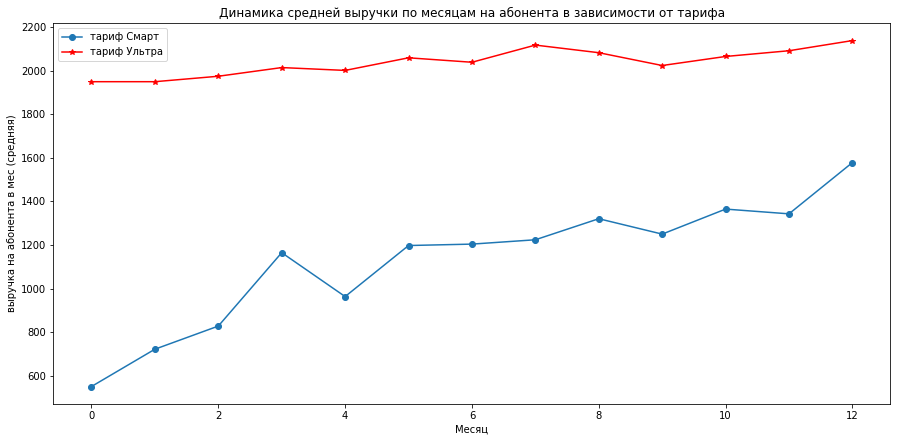

In [53]:
# изучим динамику средней выручки по месяцам на абонента
plt.figure(figsize=(15,7))
plt.title('Динамика средней выручки по месяцам на абонента в зависимости от тарифа')
plt.xlabel('Месяц')
plt.ylabel('выручка на абонента в мес (средняя)')
plt.plot(df.query('tariff == "smart"').pivot_table(index='month', values='revenue_month', aggfunc='mean'), 'o', linestyle='solid', label='тариф Смарт')
plt.plot(df.query('tariff == "ultra"').pivot_table(index='month', values='revenue_month', aggfunc='mean'), 'r*', linestyle='solid', label='тариф Ультра')
plt.legend(loc="upper left")
plt.show()



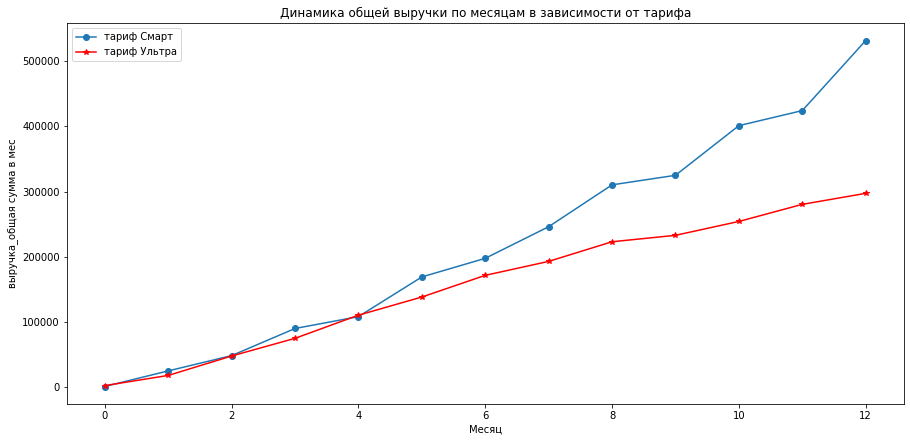

In [54]:
# визуализируем динамику общей выручки от всех абонентов по тарифам (изменения каждый месяц)
plt.figure(figsize=(15,7))
plt.title('Динамика общей выручки по месяцам в зависимости от тарифа')
plt.xlabel('Месяц')
plt.ylabel('выручка_общая сумма в мес')
plt.plot(df.query('tariff == "smart"').pivot_table(index='month', values='revenue_month', aggfunc='sum'), 'o', linestyle='solid', label='тариф Смарт')
plt.plot(df.query('tariff == "ultra"').pivot_table(index='month', values='revenue_month', aggfunc='sum'), 'r*', linestyle='solid', label='тариф Ультра')
plt.legend(loc="upper left")
plt.show()

In [55]:
# сделаем табличку по выручке для удобства сравнения
df.groupby('tariff').agg({'revenue_month':['median','mean','sum', 'count']})

revenue_month                              
              median         mean        sum count
tariff                                            
smart         1021.0  1289.641704  2875901.0  2230
ultra         1950.0  2070.030426  2041050.0   986

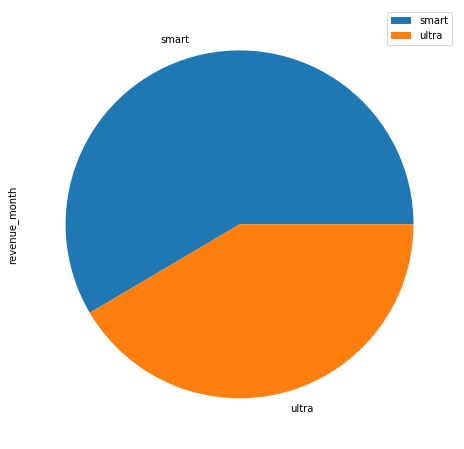

In [56]:
#визуализируем долю общей выручки по тарифам
df.groupby('tariff').agg({'revenue_month':'sum'}).plot.pie(y='revenue_month', figsize=(10, 8))

Мы произвели анализ  всех показателей активности пользователей  тарифов "Ультра" и "Смарт". При исследовании мы увидели, что в среднем абоненты, которые пользуются "Смарт", потребляют меньше ресурсов по услугам компании-оператора сотовой связи (исследовали количество звонков, длительность разговоров, сообщения и трафик интернет), чем клиенты, подключенные к "Ультра".

С другой стороны, важным критерием является выручка, которую получит компания, от пользователей тарифов сотовой связи. При исследовании данных мы увидели, что пользователи тарифа "Смарт" и платят в среднем меньше, чем пользователи тарифа "Ультра", хоть и чаще превышают лимиты, установленные тарифом (то есть выходят за рамки предоплаченных услуг и дают тем самым дополнительную выручку).

Исходя из предоставленных данных  для анализа - пропорции потребления и выручки по разным тарифным планам  свидетельствуют о более высокой прибыльности тарифа "Ультра" для компании. Причём, во всех регионах, включая Москву. Следует особо отметить: предположение, что выручка пользователей из Москвы и из других регионов равны между собой - не было опровергнуто. Следовательно, стоит обратить равное внимание на проведение рекламной компании как в Москве, так и в других регионах страны. 

Еще я бы не исключала того, что при повышенном объеме потребления услуг абонентами тарифа "Ультра", увеличиваются и затраты компании на обслуживание предоставления такого объема услуг. Поэтому для более точного понимания и предоставления рекомендации компании,  на рекламную компанию какого из двух тарифов  более выгодно вложить денежные средства, я бы еще запросила данные по затратам на предоставленные услуги в зависимости об объема и применив разницу (выручка минус расходы), смогла бы приблизиться к более точному пониманию ответа на поставленную задачу.

Также при принятии решения, нужно учитывать, что абоненты тарифа "Смарт" часто превышают установленные пакетом лимиты услуг связи, и следовательно, несут большие затраты на мобильную связь, чем предполагали. Такой факт может повлиять на отток абонентов к конкурентам. В этой связи я бы рекомендовала компании подумать над решением задачи: возможно стоило бы пересмотреть условия пакета "Смарт", предоставлении различных дисконтов, выгодного перевода на другие тарифы этой же сети, чтобы мотивировать абонентов сохранить контракт с компанией.

Дополнительно, хотелось бы обратить внимание и на крайне редкое использование услуги смс-сообщений абонентами сети  в пакете "Ультра" они почти не востребованы, а объем по лимиту большой. Так, в среднем абоненты "Ультра" используют 49 смс-сообщений в месяц, в то время как по тарифу лимит смс-сообщений равен 1000!  Возможно было бы целесообразно перенаправить невостребованные мощности по техническому обслуживанию такой опции, на что-то более выгодное для компании "Мегалайн".  

## Основной вывод по проекту

В результате изучения графиков получения выручки по тарифам, видим, что помесячная выручка пользователей тарифа "Ультра" выше и растет, одновременно как самих пользователей более чем в 2 раза меньше (что может говорить именно о недостаточном уделении внимания рекламе именно для этого тарифа). Общая Выручка по тарифам "Смарт" на момент анализа выше и растет с каждым месяцем, а помесячная для абонента - ниже, но по тарифу "Смарт" и пользователей больше (более чем в 2 раза). Так при  общей выручке для абонентов "Смарт" 2875901 р. при количестве абонентов 2230, а в тарифе "Ультра" при общем количестве абонентов 986 выручка составляет 2041050 р. На основании исследования, прихожу к выводу, что нужно увеличить рекламный бюджет для тарифа "Ультра", при привлечении большего числа пользователей тарифа "Ультра" - выручка очень возрастет и будет значительно превышать выручку от пользователей тарифа "Смарт" при одинаковом количестве абонентов.



